# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | port hedland
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | aripuana
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | hadibu
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | haiku-pauwela
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | ulladulla
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | itarantim
Processing Record 18 of Set 1 | ranot
Processing Record 19 of Set 1 | zalingei
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | puyang chengguanzhen
Processing Record 22 of Set 1 | queenstown
Process

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,26.99,83,75,8.75,CC,1727792944
1,port hedland,-20.3167,118.5667,26.03,78,20,4.12,AU,1727792765
2,lebu,-37.6167,-73.6500,9.51,57,35,5.70,CL,1727792947
3,ancud,-41.8697,-73.8203,6.44,65,39,1.01,CL,1727792948
4,aripuana,-9.1667,-60.6333,34.59,43,66,0.89,BR,1727792949


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,26.99,83,75,8.75,CC,1727792944
1,port hedland,-20.3167,118.5667,26.03,78,20,4.12,AU,1727792765
2,lebu,-37.6167,-73.6500,9.51,57,35,5.70,CL,1727792947
3,ancud,-41.8697,-73.8203,6.44,65,39,1.01,CL,1727792948
4,aripuana,-9.1667,-60.6333,34.59,43,66,0.89,BR,1727792949


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

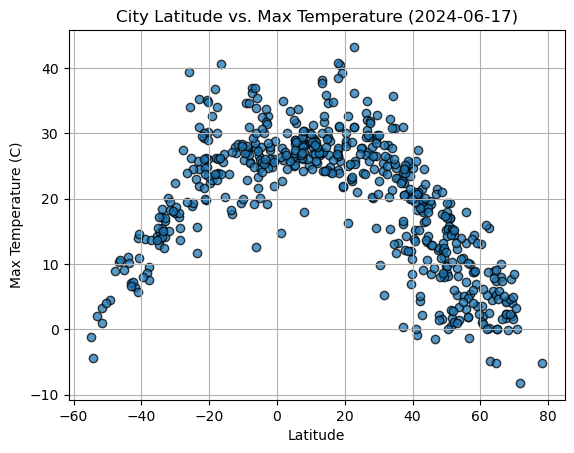

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

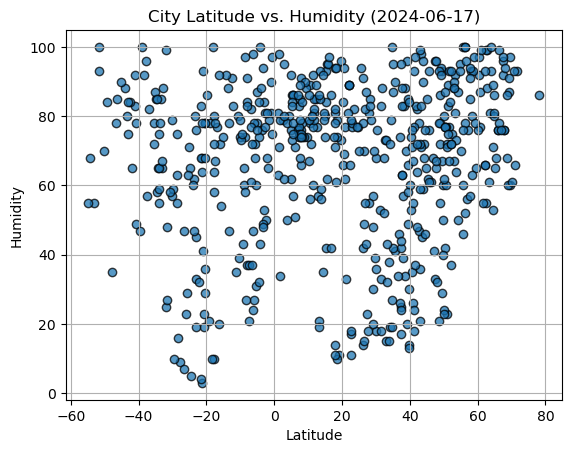

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

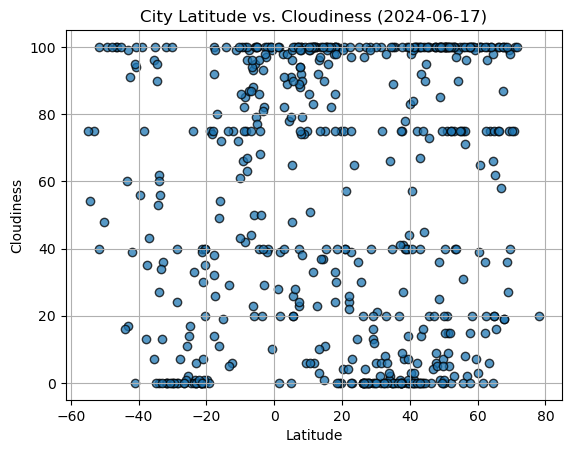

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

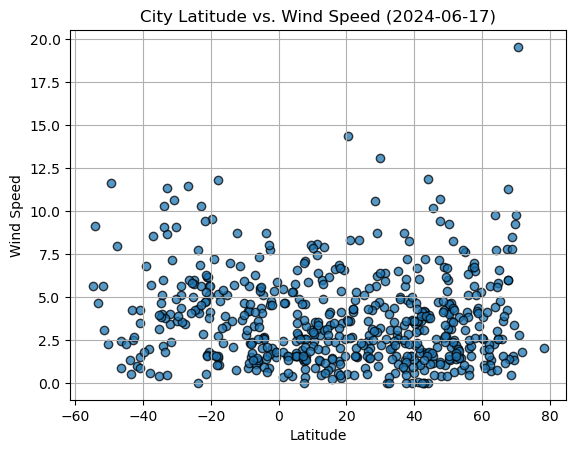

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regress(x_values, y_values, xlabel, ylabel, set_xy):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,hadibu,12.6500,54.0333,26.76,77,23,0.46,YE,1727792953
8,jamestown,42.0970,-79.2353,19.77,82,100,3.58,US,1727792954
10,haiku-pauwela,20.9219,-156.3051,25.02,77,40,3.60,US,1727792957
11,iqaluit,63.7506,-68.5145,5.85,81,75,9.77,CA,1727792958
13,wailua homesteads,22.0669,-159.3780,22.64,89,24,4.13,US,1727792960


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,26.99,83,75,8.75,CC,1727792944
1,port hedland,-20.3167,118.5667,26.03,78,20,4.12,AU,1727792765
2,lebu,-37.6167,-73.6500,9.51,57,35,5.70,CL,1727792947
3,ancud,-41.8697,-73.8203,6.44,65,39,1.01,CL,1727792948
4,aripuana,-9.1667,-60.6333,34.59,43,66,0.89,BR,1727792949


###  Temperature vs. Latitude Linear Regression Plot

In [25]:
# Linear regression on Northern Hemisphere
plot_linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Latitude", "Max Temp", (0,-10))

In [26]:
# Linear regression on Southern Hemisphere
plot_linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Latitude", "Max Temp", (-30,5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE 

### Humidity vs. Latitude Linear Regression Plot

In [28]:
# Northern Hemisphere
plot_linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Latitude", "Humidity", (40,40))

In [29]:
# Southern Hemisphere
plot_linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Latitude", "Humidity", (-40,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [30]:
# Northern Hemisphere
plot_linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Latitude", "Cloudiness", (40,40))

In [31]:
# Southern Hemisphere
plot_linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Latitude", "Cloudiness", (-40,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [32]:
# Northern Hemisphere
plot_linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Latitude", "Wind Speed", (10,20))

The r^2-value is: 0.010198739304669231


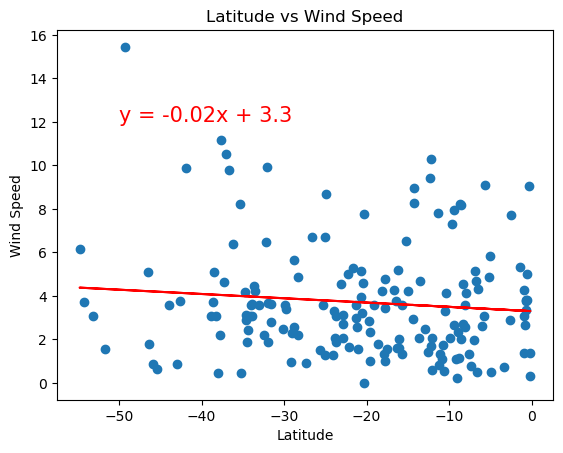

In [22]:
# Southern Hemisphere
plot_linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Latitude", "Wind Speed", (-40,15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE